<center><img src = "https://static.toiimg.com/thumb/msid-68846795,width-400,resizemode-4/68846795.jpg"></center>

<h2><center>DSECLZG628T: Dissertation  </center></h2>

**Name**: Justin P Mathew <br>
**Supervisor**: Venkata Girish Kumar Nidra <br>
**Examiner**: Raghavendra G S

# Predictive Modeling for Policy Lapse Forecasting Using Machine Learning

## Project Overview

This project aims to develop a predictive model for forecasting the lapse of life insurance policies using machine learning techniques. The dataset used for this analysis is taken from Kaggle and contains various features related to policyholders and their insurance policies.

**Dataset Source:** [Kaggle - Life Insurance Policy Data](https://www.kaggle.com/datasets/blackclover1/life-insurance-policy-data/data)

**Dataset Details:**
- **Total Rows:** 185,560
- **Total Columns:** 22 (before preprocessing)
- **Target Variable:** `POLICY STATUS` - Whether the policy has lapsed (`Lapse`) or is still active (`Inforce`).
- **Features Include:**
  - Demographics: `ENTRY AGE`, `SEX`
  - Policy Details: `POLICY TYPE 1`, `POLICY TYPE 2`, `PAYMENT MODE`
  - Financial Information: `BENEFIT`, `Premium`, `INITIAL BENEFIT`
  - Other: `NON LAPSE GUARANTEED`, `SUBSTANDARD RISK`, `Policy Year`

## Objective

The objective is to identify the most effective machine learning model to predict whether a policy will lapse or remain in force, based on the available features. We will explore various algorithms, including Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, XGBoost, and Support Vector Machines (SVM).

## Steps to be Covered:

1. **Exploratory Data Analysis (EDA):**
   - Analyze and visualize the distribution of features.
   - Investigate relationships between features and the target variable (`POLICY STATUS`).
   - Handle missing values and encode categorical variables.

2. **Data Preprocessing:**
   - Drop irrelevant columns with high missing values.
   - Convert categorical variables to numerical formats using One-Hot Encoding and Label Encoding.

3. **Model Development:**
   - Split the dataset into training and testing sets.
   - Train multiple machine learning models on the training set.
   - Evaluate model performance on the testing set using metrics such as accuracy, ROC AUC score, and classification reports.

4. **Conclusion:**
   - Identify the best-performing model for policy lapse forecasting and discuss potential next steps.



In [ ]:
#Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
#Read the DataSet
df=pd.read_csv('Kaggle.csv', sep=';')

In [ ]:
# Setting the option to display all columns
pd.set_option('display.max_columns', None)

#Display first 5 rows
df.head()

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,BENEFIT,NON LAPSE GUARANTEED,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date,Unnamed: 20,Unnamed: 21
0,1,1,1,36,F,1,1,A,Annually,Inforce,"200,000",NO NLG,0.0,0,0.0,N,8.000000,9,280,Aug-11,NaN,NaN
1,1,1,1,42,M,1,2,A,Annually,Inforce,"100,000",NO NLG,0.0,0,0.0,N,8.000000,9,200,Aug-11,NaN,NaN
2,1,1,2,40,M,2,3,A,Annually,Lapse,"80,000",NO NLG,0.0,0,0.0,N,8.000000,9,"1,289",Aug-11,NaN,NaN
3,1,1,3,39,M,1,2,A,Monthly,Lapse,"100,000",NO NLG,0.0,0,0.0,N,8.000000,9,216,Aug-11,NaN,NaN
4,1,1,4,44,M,1,2,A,Annually,Lapse,"100,000",NO NLG,0.0,0,0.0,N,7.916667,8,140,Sep-11,NaN,NaN


In [ ]:
# Get the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 185560
Number of columns: 22


In [ ]:
# List the Columns
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date',
       'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [ ]:
# Display the data types of each column
df.dtypes

,0
CHANNEL1,int64
CHANNEL2,int64
CHANNEL3,int64
ENTRY AGE,int64
SEX,object
POLICY TYPE 1,int64
POLICY TYPE 2,int64
POLICY TYPE 3,object
PAYMENT MODE,object
POLICY STATUS,object


In [ ]:
#Concise Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185560 entries, 0 to 185559
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CHANNEL1                   185560 non-null  int64  
 1   CHANNEL2                   185560 non-null  int64  
 2   CHANNEL3                   185560 non-null  int64  
 3   ENTRY AGE                  185560 non-null  int64  
 4   SEX                        185560 non-null  object 
 5   POLICY TYPE 1              185560 non-null  int64  
 6   POLICY TYPE 2              185560 non-null  int64  
 7   POLICY TYPE 3              185560 non-null  object 
 8   PAYMENT MODE               185560 non-null  object 
 9   POLICY STATUS              185560 non-null  object 
 10  BENEFIT                    185560 non-null  object 
 11  NON LAPSE GUARANTEED       185560 non-null  object 
 12  SUBSTANDARD RISK           185560 non-null  float64
 13  NUMBER OF ADVANCE PREMIUM  18

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Summary statistics
print(df.describe())

            CHANNEL1       CHANNEL2       CHANNEL3      ENTRY AGE  \
count  185560.000000  185560.000000  185560.000000  185560.000000   
mean        3.600065       2.572322       7.966200      32.119309   
std         1.991486       0.567780      13.693194      12.827964   
min         1.000000       1.000000       0.000000       0.000000   
25%         2.000000       2.000000       0.000000      25.000000   
50%         2.000000       3.000000       0.000000      32.000000   
75%         6.000000       3.000000      11.000000      41.000000   
max         8.000000       3.000000      82.000000      70.000000   

       POLICY TYPE 1  POLICY TYPE 2  SUBSTANDARD RISK  \
count  185560.000000  185560.000000     185560.000000   
mean        5.033014      21.893490          0.252834   
std         3.533662      19.124646          5.002793   
min         1.000000       1.000000        -99.000000   
25%         3.000000       6.000000          0.000000   
50%         3.000000      13.000000 

In [ ]:
# Check for missing values
df.isnull().sum()

,0
CHANNEL1,0
CHANNEL2,0
CHANNEL3,0
ENTRY AGE,0
SEX,0
POLICY TYPE 1,0
POLICY TYPE 2,0
POLICY TYPE 3,0
PAYMENT MODE,0
POLICY STATUS,0


In [ ]:
#Drop Potentially Irrelevant Columns with Null Values
df.drop(columns=['Unnamed: 20', 'Unnamed: 21'], inplace=True)

In [ ]:
# Converting the 'SEX' column from categorical values ('F' and 'M') to numerical values (0 and 1)
df['SEX'] = df['SEX'].map({'F': 0, 'M': 1})

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['POLICY TYPE 3'] = le.fit_transform(df['POLICY TYPE 3'])

In [ ]:
# Initialize the OneHotEncoder for PAYMENT MODE and NON LAPSE GUARANTEED
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore') # drop='first' to avoid dummy variable trap

# Fit and transform the PAYMENT MODE column
payment_mode_encoded = onehot_encoder.fit_transform(df[['PAYMENT MODE']])
payment_mode_encoded_df = pd.DataFrame(payment_mode_encoded, columns=onehot_encoder.get_feature_names_out(['PAYMENT MODE']))

# Fit and transform the NON LAPSE GUARANTEED column
nlg_encoded = onehot_encoder.fit_transform(df[['NON LAPSE GUARANTEED']])
nlg_encoded_df = pd.DataFrame(nlg_encoded, columns=onehot_encoder.get_feature_names_out(['NON LAPSE GUARANTEED']))

# Concatenate the original DataFrame with the new encoded DataFrames
df = pd.concat([df.drop(['PAYMENT MODE', 'NON LAPSE GUARANTEED'], axis=1), payment_mode_encoded_df, nlg_encoded_df], axis=1)

In [ ]:
df.head()

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,POLICY STATUS,BENEFIT,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date,PAYMENT MODE_Monthly,PAYMENT MODE_Quaterly,PAYMENT MODE_Semiannually,PAYMENT MODE_Single Premium,NON LAPSE GUARANTEED_NLG Not Active,NON LAPSE GUARANTEED_NLG Suspend,NON LAPSE GUARANTEED_NO NLG
0,1,1,1,36,0,1,1,0,Inforce,"200,000",0.0,0,0.0,N,8.000000,9,280,Aug-11,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,1,42,1,1,2,0,Inforce,"100,000",0.0,0,0.0,N,8.000000,9,200,Aug-11,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,2,40,1,2,3,0,Lapse,"80,000",0.0,0,0.0,N,8.000000,9,"1,289",Aug-11,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,3,39,1,1,2,0,Lapse,"100,000",0.0,0,0.0,N,8.000000,9,216,Aug-11,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,4,44,1,1,2,0,Lapse,"100,000",0.0,0,0.0,N,7.916667,8,140,Sep-11,0.0,0.0,0.0,0.0,0.0,0.0,1.0


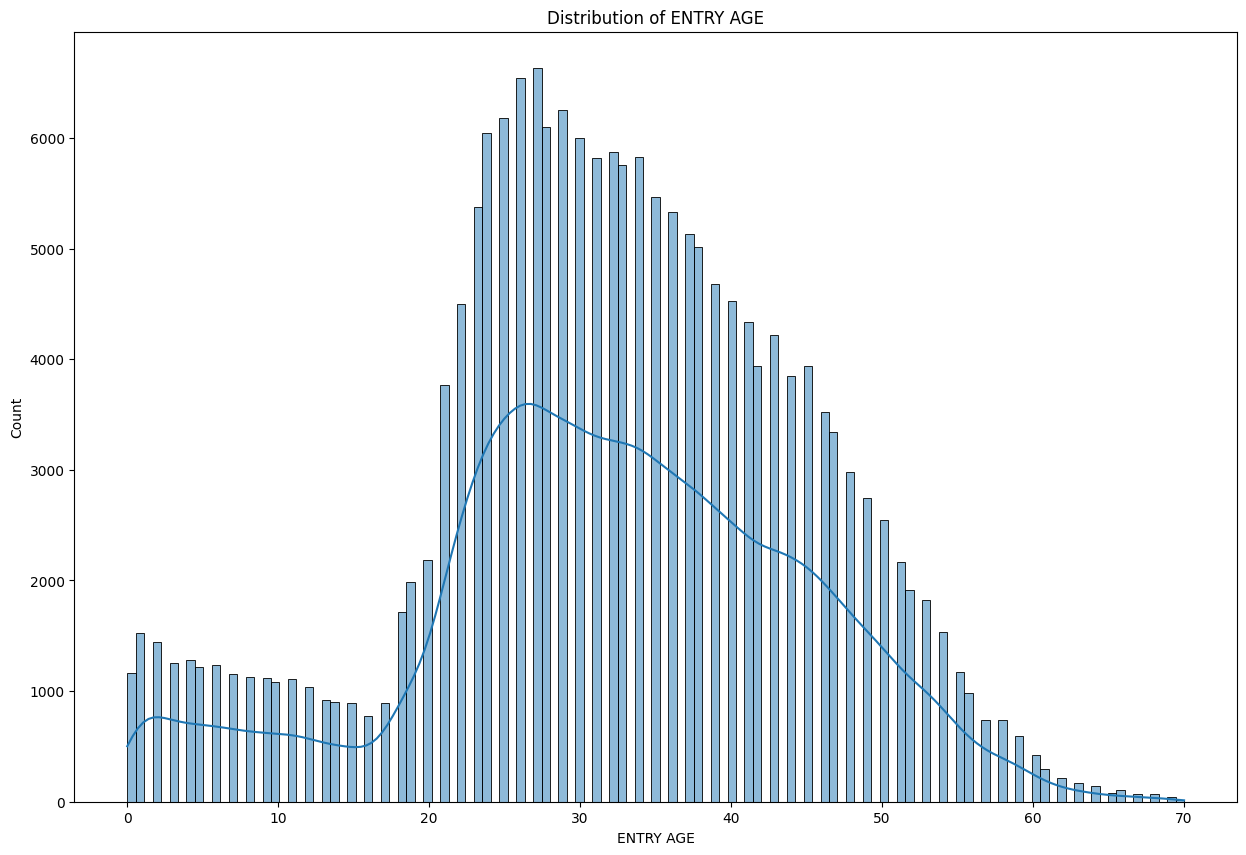

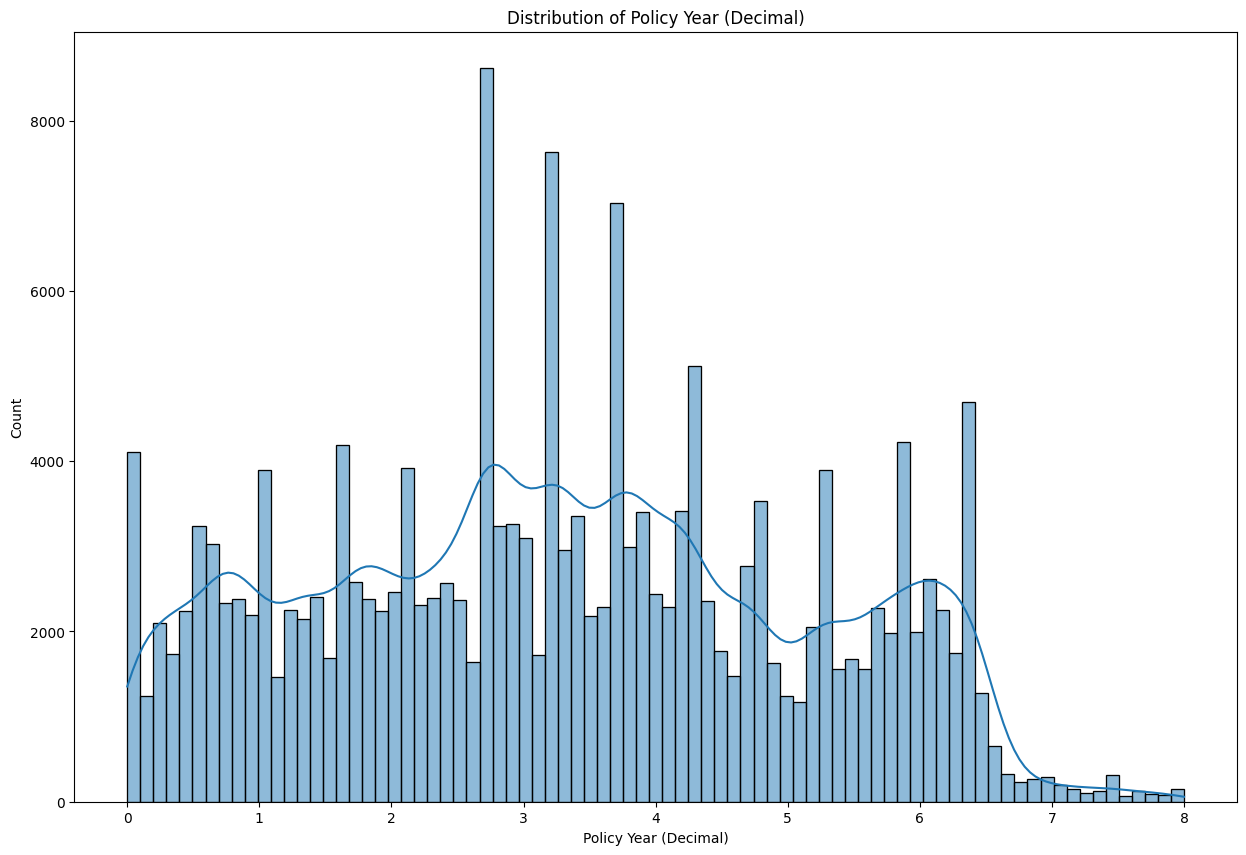

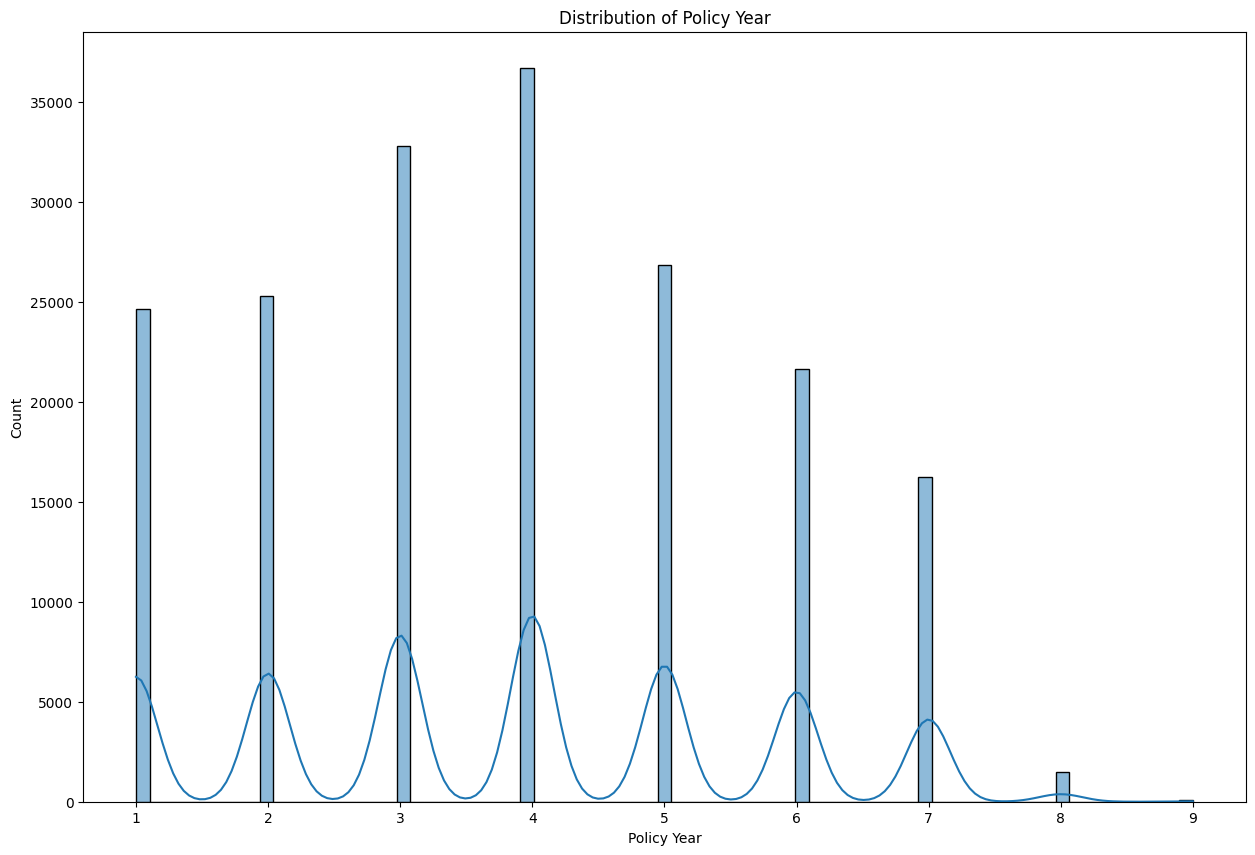

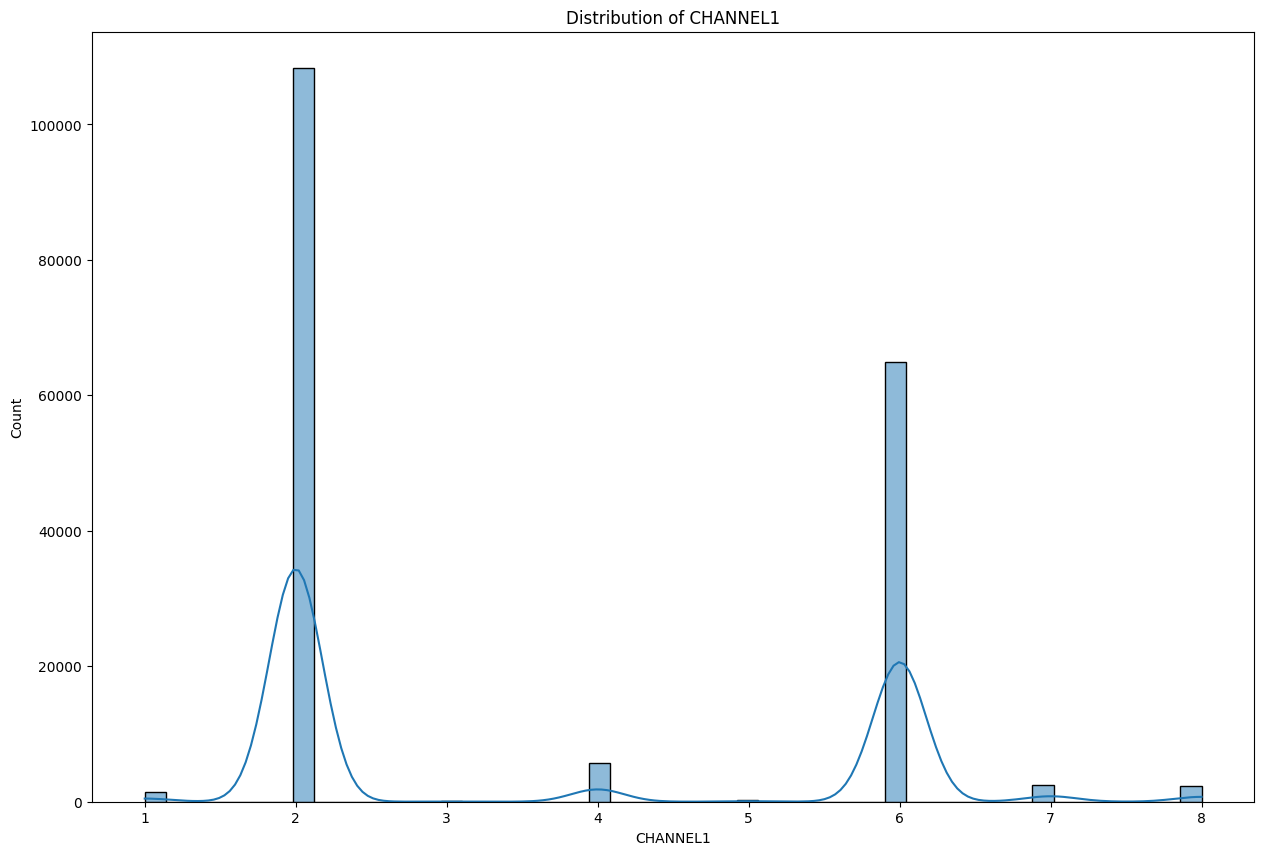

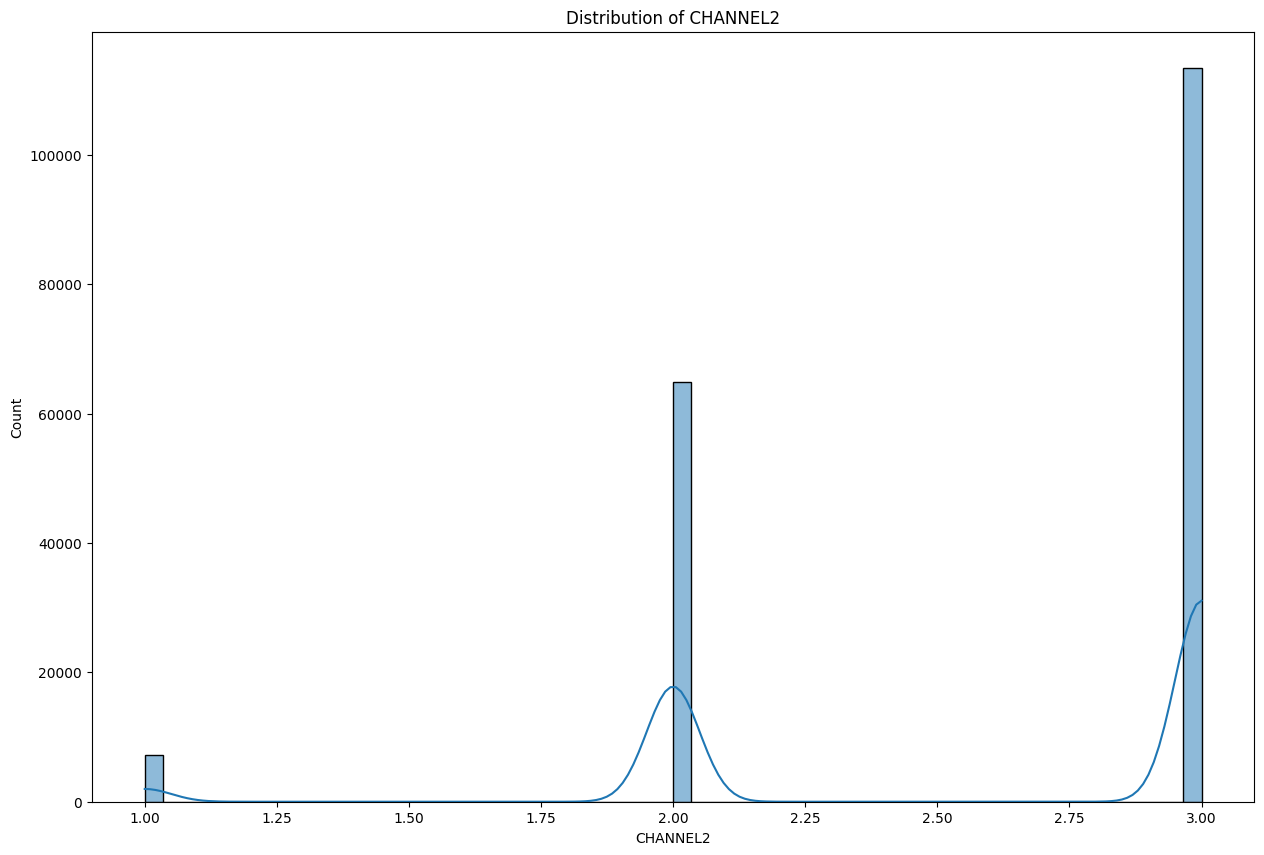

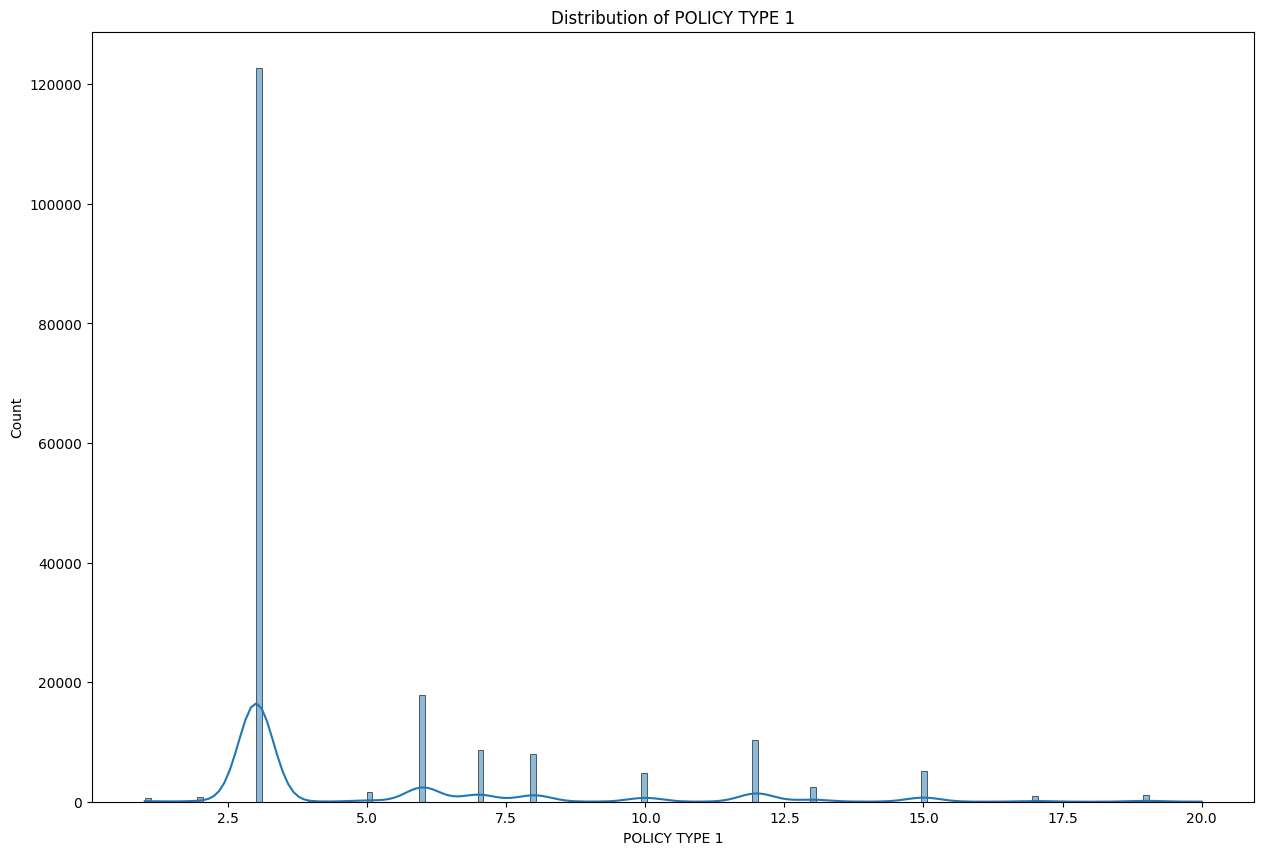

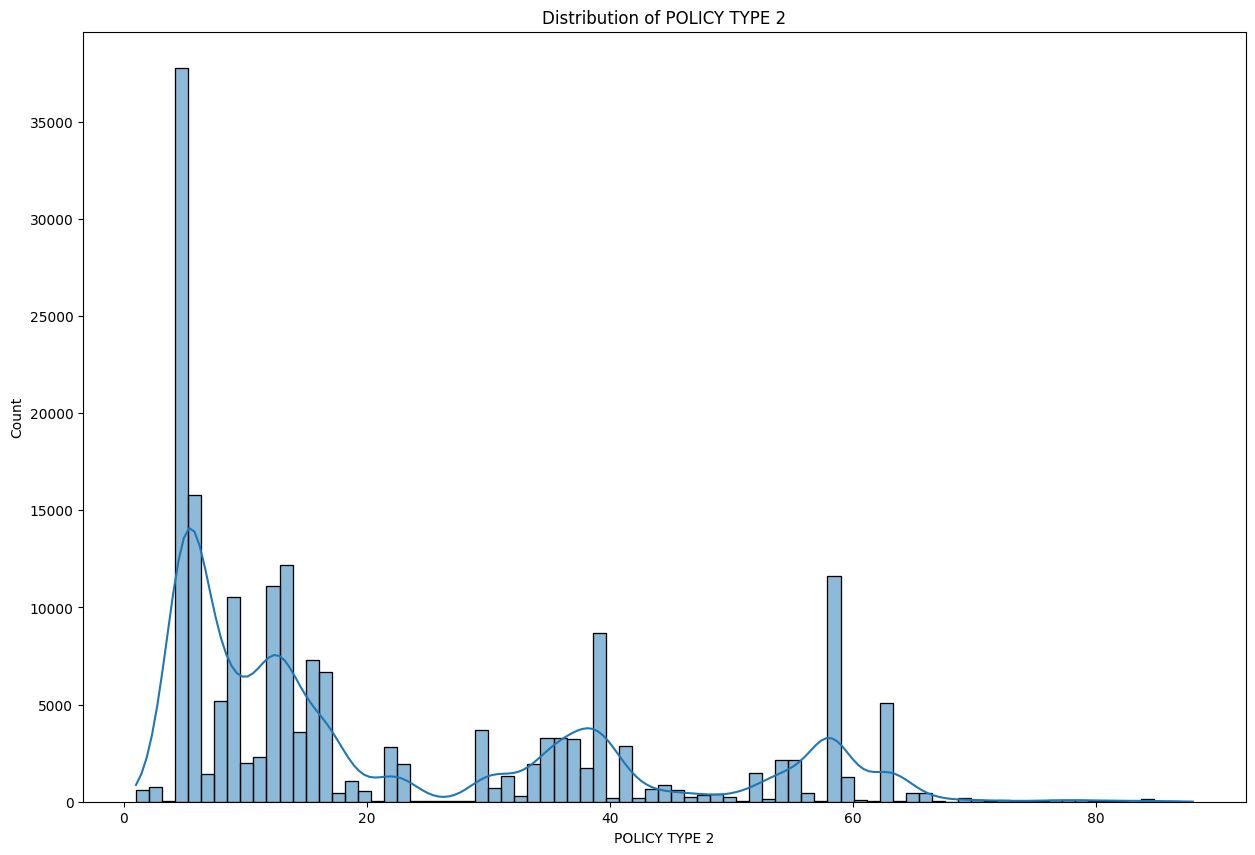

In [ ]:
# List of numerical features to plot
numerical_features = ['ENTRY AGE', 'Policy Year (Decimal)', 'Policy Year','CHANNEL1', 'CHANNEL2', 'POLICY TYPE 1', 'POLICY TYPE 2']

# Plot distributions for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(15, 10))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

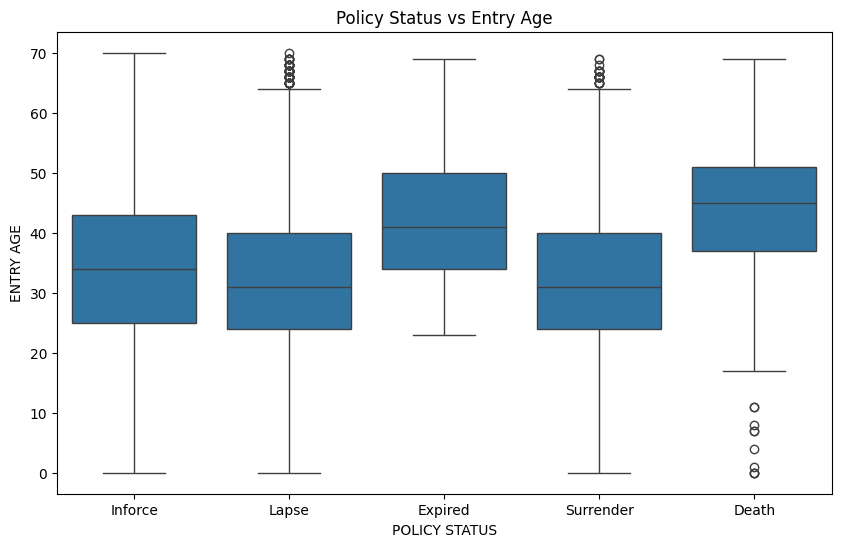

In [ ]:
# Visualize the relationship between ENTRY AGE and POLICY STATUS
plt.figure(figsize=(10, 6))
sns.boxplot(x='POLICY STATUS', y='ENTRY AGE', data=df)
plt.title('Policy Status vs Entry Age')
plt.show()

In [ ]:
#Unique Values for Policy Status Column
unique_policy_status = df['POLICY STATUS'].unique()

unique_policy_status

array(['Inforce', 'Lapse', 'Expired', 'Surrender', 'Death'], dtype=object)

IS_LAPSE
1    98865
0    86695
Name: count, dtype: int64


<ipython-input-17-3b204633ff5f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lapse_counts.index, y=lapse_counts.values, palette='viridis')


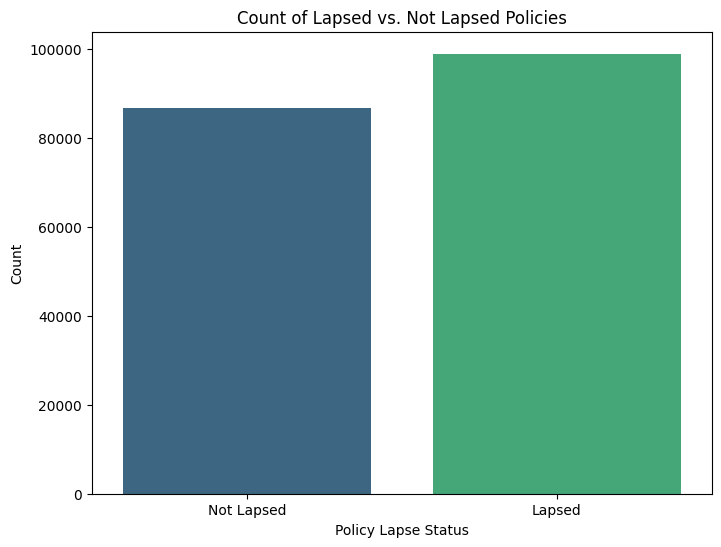

In [ ]:
# Create the binary target column
df['IS_LAPSE'] = df['POLICY STATUS'].apply(lambda x: 1 if x == 'Lapse' else 0)

# Check the distribution of the new binary target column
lapse_counts = df['IS_LAPSE'].value_counts()
print(lapse_counts)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=lapse_counts.index, y=lapse_counts.values, palette='viridis')
plt.xlabel('Policy Lapse Status')
plt.ylabel('Count')
plt.title('Count of Lapsed vs. Not Lapsed Policies')
plt.xticks([0, 1], ['Not Lapsed', 'Lapsed'])
plt.show()

# Encode other categorical variables if needed
label_encoders = {}
for column in df.select_dtypes(include=['object', 'category']).columns:
    if column not in ['POLICY STATUS']:  # Skip the original policy status column
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Drop the original 'POLICY STATUS'
df.drop(columns=['POLICY STATUS'], inplace=True)

In [ ]:
#Print Top 5 Rows
df.head()

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,BENEFIT,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date,PAYMENT MODE_Monthly,PAYMENT MODE_Quaterly,PAYMENT MODE_Semiannually,PAYMENT MODE_Single Premium,NON LAPSE GUARANTEED_NLG Not Active,NON LAPSE GUARANTEED_NLG Suspend,NON LAPSE GUARANTEED_NO NLG,IS_LAPSE
0,1,1,1,36,0,1,1,0,826,0.0,0,0.0,0,8.000000,9,1349,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1,1,1,42,1,1,2,0,147,0.0,0,0.0,0,8.000000,9,1201,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,1,1,2,40,1,2,3,0,2605,0.0,0,0.0,0,8.000000,9,198,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1,1,3,39,1,1,2,0,147,0.0,0,0.0,0,8.000000,9,1232,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1,1,4,44,1,1,2,0,147,0.0,0,0.0,0,7.916667,8,700,89,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


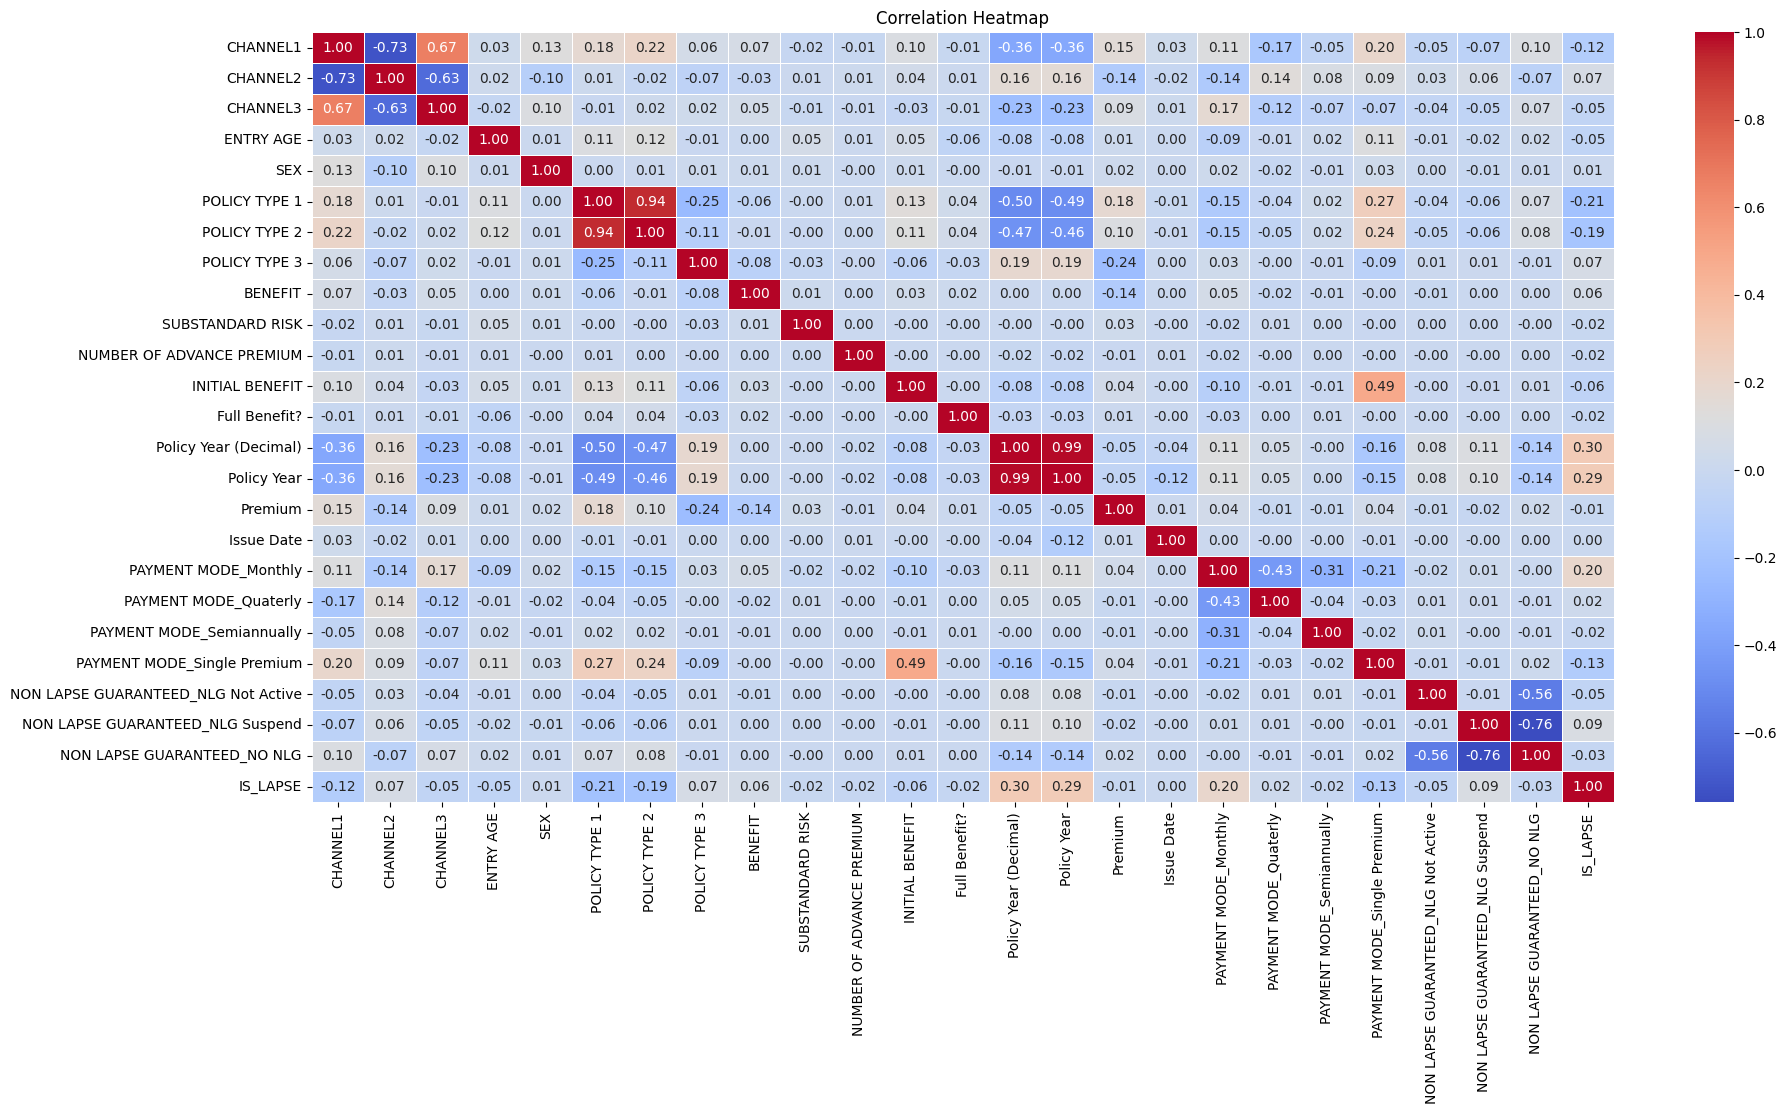

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(21, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Identify features with strong correlation to target
corr_with_target = corr_matrix['IS_LAPSE'].abs().sort_values(ascending=False)
print("Features most correlated with 'IS_LAPSE':\n", corr_with_target)

Features most correlated with 'IS_LAPSE':
 IS_LAPSE                               1.000000
Policy Year (Decimal)                  0.297374
Policy Year                            0.289503
POLICY TYPE 1                          0.205608
PAYMENT MODE_Monthly                   0.201574
POLICY TYPE 2                          0.187489
PAYMENT MODE_Single Premium            0.127425
CHANNEL1                               0.122944
NON LAPSE GUARANTEED_NLG Suspend       0.087757
CHANNEL2                               0.070720
POLICY TYPE 3                          0.066886
INITIAL BENEFIT                        0.062336
BENEFIT                                0.057667
ENTRY AGE                              0.052283
NON LAPSE GUARANTEED_NLG Not Active    0.047123
CHANNEL3                               0.047078
NON LAPSE GUARANTEED_NO NLG            0.028657
Full Benefit?                          0.024552
PAYMENT MODE_Semiannually              0.022161
PAYMENT MODE_Quaterly                  0.0197

# **Feature Selection**

In [ ]:
#Feature Selection - Selecting features with correlation > 0.01
selected_features = corr_with_target[corr_with_target >= 0.01].index.tolist()
selected_features.remove('IS_LAPSE')  # Remove the target column itself

print("Selected Features for Modeling:\n", selected_features)

Selected Features for Modeling:
 ['Policy Year (Decimal)', 'Policy Year', 'POLICY TYPE 1', 'PAYMENT MODE_Monthly', 'POLICY TYPE 2', 'PAYMENT MODE_Single Premium', 'CHANNEL1', 'NON LAPSE GUARANTEED_NLG Suspend', 'CHANNEL2', 'POLICY TYPE 3', 'INITIAL BENEFIT', 'BENEFIT', 'ENTRY AGE', 'NON LAPSE GUARANTEED_NLG Not Active', 'CHANNEL3', 'NON LAPSE GUARANTEED_NO NLG', 'Full Benefit?', 'PAYMENT MODE_Semiannually', 'PAYMENT MODE_Quaterly', 'NUMBER OF ADVANCE PREMIUM', 'SUBSTANDARD RISK', 'Premium']


# **Model Selection and Training**

In [ ]:
# Define features and target variable
X = df[selected_features]
y = df['IS_LAPSE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 129892 rows
Test set size: 55668 rows


In [ ]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(solver='saga',max_iter=5000, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42))
]

In [ ]:
# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test, scale=False):
    for name, model in models:
        if scale:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]

        print(f"Model: {name}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("-" * 50)

In [ ]:
# Evaluate models (without scaling)
evaluate_models(models[:-1], X_train, X_test, y_train, y_test)

Model: Logistic Regression
Accuracy: 0.5763
ROC AUC: 0.6096
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.54     25837
           1       0.60      0.62      0.61     29831

    accuracy                           0.58     55668
   macro avg       0.57      0.57      0.57     55668
weighted avg       0.58      0.58      0.58     55668

Confusion Matrix:
 [[13729 12108]
 [11476 18355]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.6723
ROC AUC: 0.7401
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.62      0.64     25837
           1       0.69      0.71      0.70     29831

    accuracy                           0.67     55668
   macro avg       0.67      0.67      0.67     55668
weighted avg       0.67      0.67      0.67     55668

Confusion Matrix:
 [[16148  9689]
 [ 8553 21278]]
---------------------------------

In [ ]:
# Evaluate SVM with scaling
evaluate_models([models[-1]], X_train, X_test, y_train, y_test, scale=True)

Model: SVM
Accuracy: 0.6791
ROC AUC: 0.7309
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.61      0.64     25837
           1       0.69      0.74      0.71     29831

    accuracy                           0.68     55668
   macro avg       0.68      0.67      0.67     55668
weighted avg       0.68      0.68      0.68     55668

Confusion Matrix:
 [[15726 10111]
 [ 7755 22076]]
--------------------------------------------------


In [ ]:
# Grid Search for Hyperparameter Tuning

# Decision Tree Grid Search
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best ROC AUC for Decision Tree: {grid_search_dt.best_score_:.4f}")

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best ROC AUC for Decision Tree: 0.7486
